# 1. Importing Libraries

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
import re
pd.pandas.set_option('display.max_columns',None)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,roc_auc_score,f1_score

# 2. Loading Dataset

In [10]:
df=pd.read_csv(r'C:/Users/pbann/Downloads/data.csv',sep='\,')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   "footfall    944 non-null    object
 1   atemp        944 non-null    int64 
 2   selfLR       944 non-null    int64 
 3   ClinLR       944 non-null    int64 
 4   DoleLR       944 non-null    int64 
 5   PID          944 non-null    int64 
 6   outpressure  944 non-null    int64 
 7   inpressure   944 non-null    int64 
 8   temp         944 non-null    int64 
 9   fail"        944 non-null    object
dtypes: int64(8), object(2)
memory usage: 73.9+ KB


C:\Users\pbann\AppData\Local\Temp/ipykernel_13132/83406963.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(r'C:/Users/pbann/Downloads/data.csv',sep='\,')


In [11]:
df

,"""footfall",atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,"fail"""
0,"""0",7,7,1,6,6,36,3,1,"1"""
1,"""190",1,3,3,5,1,20,4,1,"0"""
2,"""31",7,2,2,6,1,24,6,1,"0"""
3,"""83",4,3,4,5,1,28,6,1,"0"""
4,"""640",7,5,6,4,0,68,6,1,"0"""
...,...,...,...,...,...,...,...,...,...,...
939,"""0",7,7,1,6,4,73,6,24,"1"""
940,"""0",7,5,2,6,6,50,6,24,"1"""
941,"""0",3,6,2,7,5,43,6,24,"1"""
942,"""0",6,6,2,5,6,46,7,24,"1"""


# 3. Objective: 
### 1. The dataset shows the details of  a sensor through which the shift in performance is to be analysed.
### 2. Predict equipment failure.


# 4. About the dataset:
### 1. Each observation has 10 features including target.
### 2. Shape of dataset is 944 records and 10 features.
### 2.  Target feature is having bynary response this shows its a binary classification problem.

# 5. Data Cleaning :

In [12]:
df.isnull().sum()

"footfall      0
atemp          0
selfLR         0
ClinLR         0
DoleLR         0
PID            0
outpressure    0
inpressure     0
temp           0
fail"          0
dtype: int64

## 1. checking the null values : dataset has no null values.

In [13]:
df.dtypes

"footfall      object
atemp           int64
selfLR          int64
ClinLR          int64
DoleLR          int64
PID             int64
outpressure     int64
inpressure      int64
temp            int64
fail"          object
dtype: object

In [14]:
df = df.rename(columns={'"footfall':'footfall','fail"':'fail'}) # removing the special characters from the columns

In [15]:
df.head()

,footfall,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,fail
0,"""0",7,7,1,6,6,36,3,1,"1"""
1,"""190",1,3,3,5,1,20,4,1,"0"""
2,"""31",7,2,2,6,1,24,6,1,"0"""
3,"""83",4,3,4,5,1,28,6,1,"0"""
4,"""640",7,5,6,4,0,68,6,1,"0"""


In [16]:
# removing special characters from the footfall column.
parts = df['footfall'].str.split('"')
df['footfall'] = parts.str[1].str.extract('(\d+)')
df['footfall']

0        0
1      190
2       31
3       83
4      640
      ... 
939      0
940      0
941      0
942      0
943     18
Name: footfall, Length: 944, dtype: object

In [17]:
df['fail'].unique()

array(['1"', '0"'], dtype=object)

In [18]:
df['fail'] = df['fail'].map({'1"':1,'0"':0})

In [19]:
df

,footfall,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


In [93]:
df.to_csv("case_study.csv")

In [20]:
df['footfall']=df['footfall'].astype(int)   # changing the data type to integer as values are discrete variables

In [21]:
df.dtypes

footfall       int32
atemp          int64
selfLR         int64
ClinLR         int64
DoleLR         int64
PID            int64
outpressure    int64
inpressure     int64
temp           int64
fail           int64
dtype: object

In [22]:
df

,footfall,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


# 6. EDA and Feature Engineering

## Checking the missing values 

<function matplotlib.pyplot.show(close=None, block=None)>

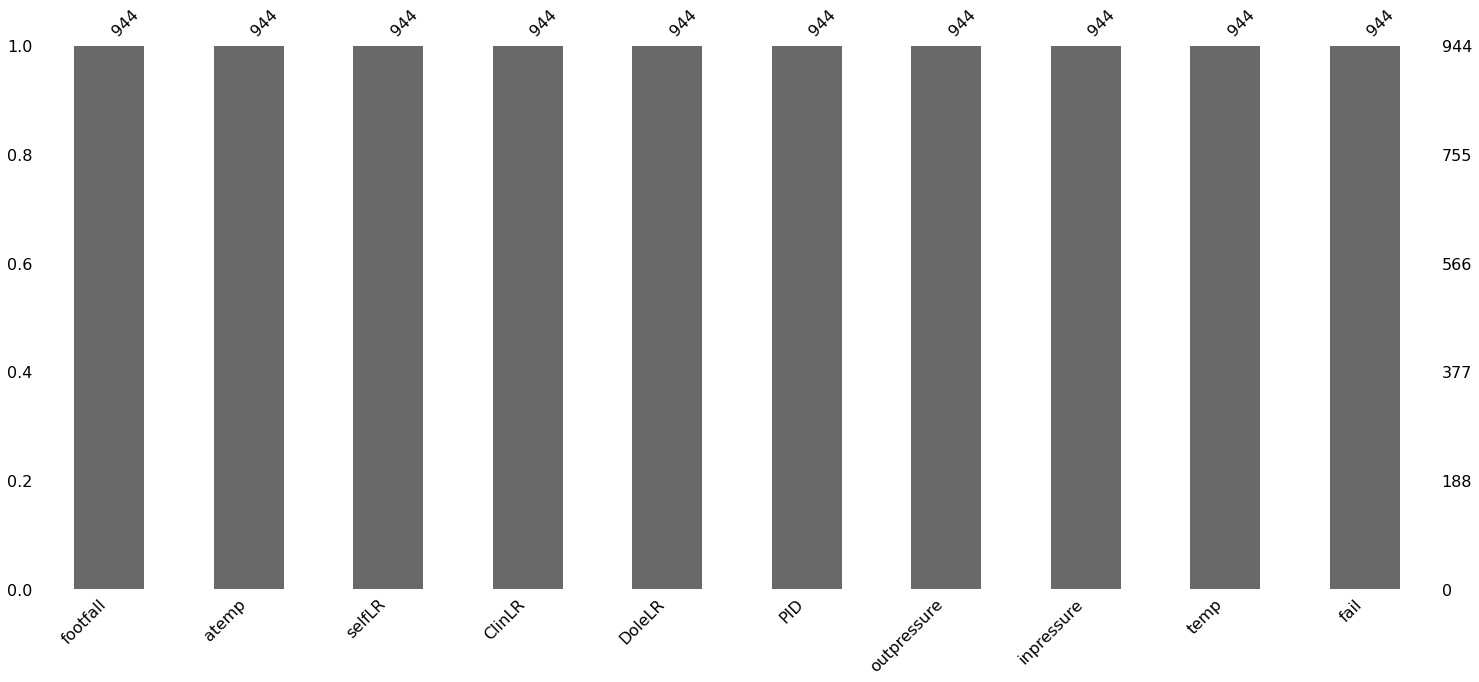

In [23]:
msno.bar(df)
plt.show

# observation: dataset has no missing values.

In [24]:
df.groupby('fail').count()

,footfall,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp
fail,,,,,,,,,
0,551,551,551,551,551,551,551,551,551
1,393,393,393,393,393,393,393,393,393


# observation : data set is balanced

In [26]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

array([[<AxesSubplot:title={'center':'footfall'}>,
        <AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'selfLR'}>],
       [<AxesSubplot:title={'center':'ClinLR'}>,
        <AxesSubplot:title={'center':'DoleLR'}>,
        <AxesSubplot:title={'center':'PID'}>],
       [<AxesSubplot:title={'center':'outpressure'}>,
        <AxesSubplot:title={'center':'inpressure'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'fail'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

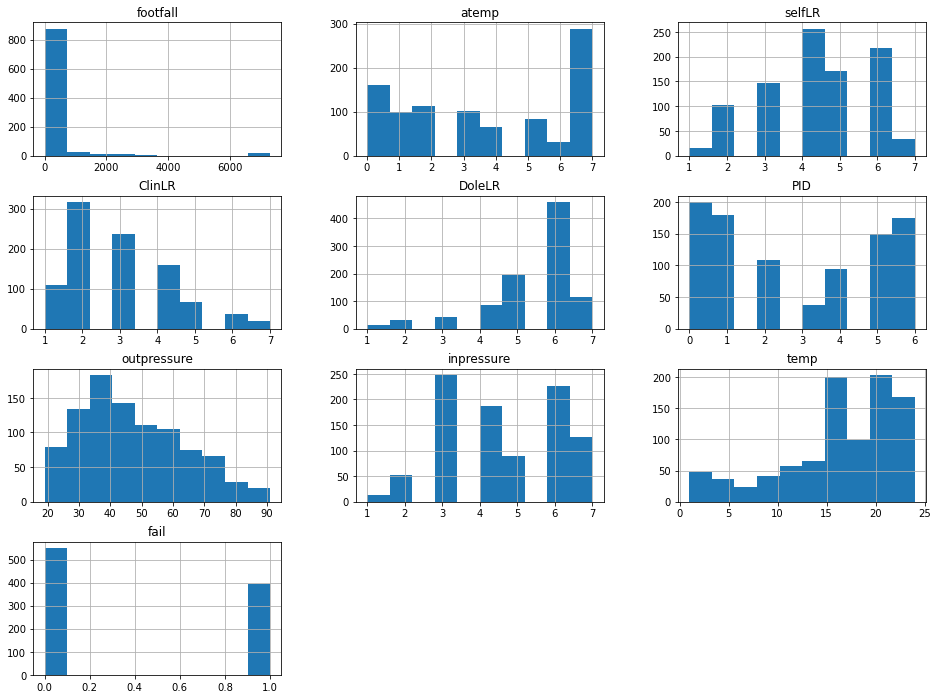

In [27]:
df.hist()

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

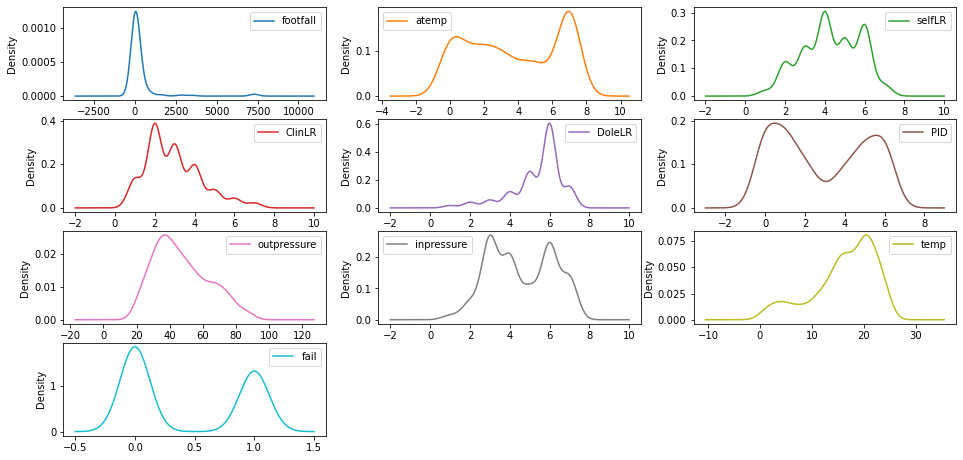

In [35]:
df.plot(kind='density', subplots=True, sharex=False, layout = (6,3))

# Observation : Dataset is highley skewed

footfall          AxesSubplot(0.125,0.772143;0.227941x0.107857)
atemp          AxesSubplot(0.398529,0.772143;0.227941x0.107857)
selfLR         AxesSubplot(0.672059,0.772143;0.227941x0.107857)
ClinLR            AxesSubplot(0.125,0.642714;0.227941x0.107857)
DoleLR         AxesSubplot(0.398529,0.642714;0.227941x0.107857)
PID            AxesSubplot(0.672059,0.642714;0.227941x0.107857)
outpressure       AxesSubplot(0.125,0.513286;0.227941x0.107857)
inpressure     AxesSubplot(0.398529,0.513286;0.227941x0.107857)
temp           AxesSubplot(0.672059,0.513286;0.227941x0.107857)
fail              AxesSubplot(0.125,0.383857;0.227941x0.107857)
dtype: object

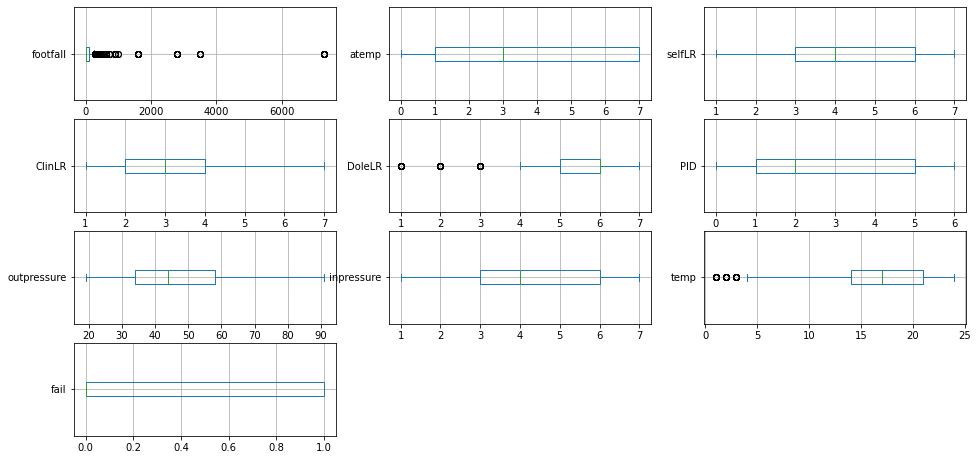

In [36]:
df.plot(kind = 'box', 
                 subplots = True, 
                 sharex = False, sharey =  False, 
                 layout = (6,3), vert = False, grid = True)

# Dataset has no outliers

In [16]:
df.describe()

,footfall,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


# univariate Analysis:

<AxesSubplot:xlabel='inpressure', ylabel='count'>

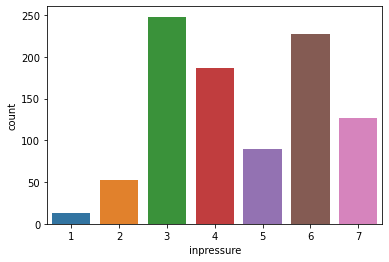

In [17]:
sns.countplot(x=df['inpressure'])

<AxesSubplot:xlabel='PID', ylabel='count'>

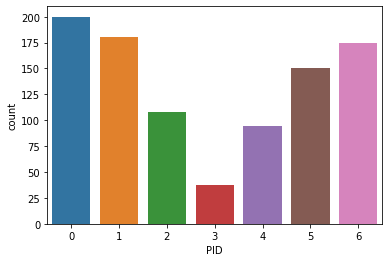

In [18]:
sns.countplot(x=df['PID'])

<AxesSubplot:xlabel='ClinLR', ylabel='count'>

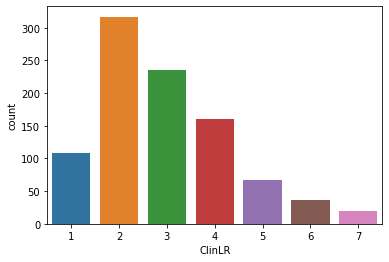

In [19]:
sns.countplot(x=df['ClinLR'])

<AxesSubplot:xlabel='temp', ylabel='count'>

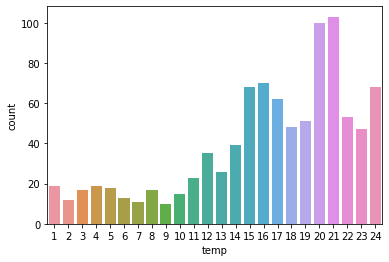

In [20]:
sns.countplot(x=df['temp'])

<AxesSubplot:xlabel='inpressure', ylabel='count'>

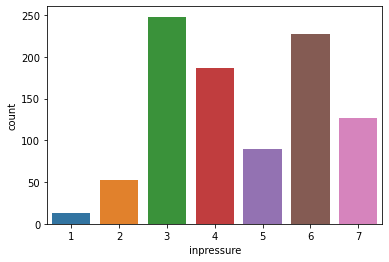

In [21]:
sns.countplot(x=df['inpressure'])

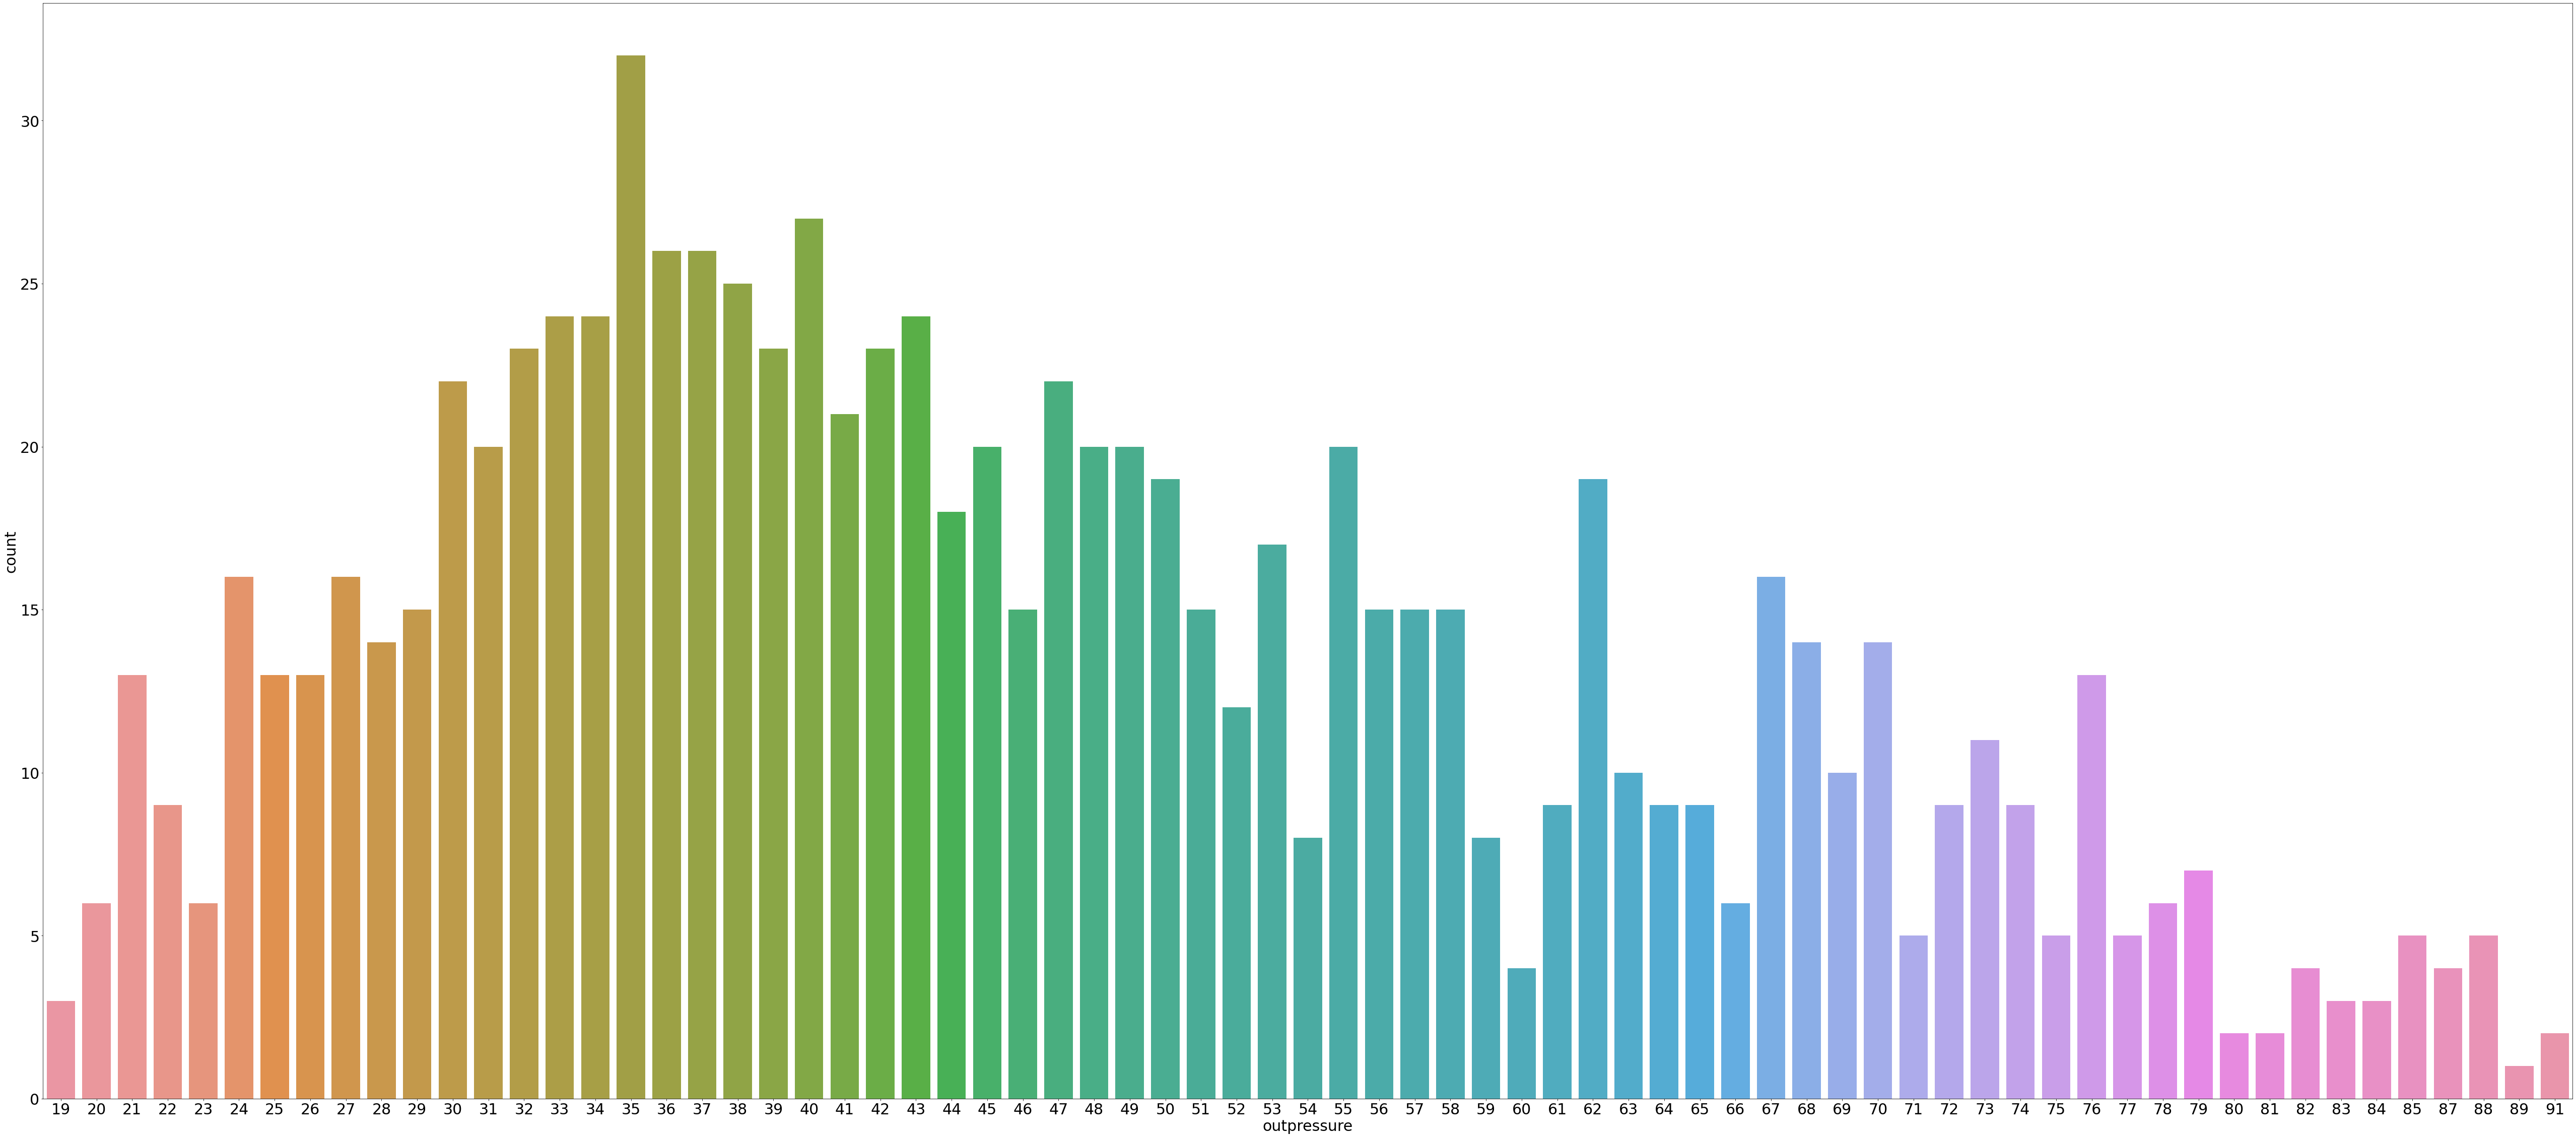

In [27]:

fig=plt.figure(figsize=(90,40))
sns.countplot(x=df['outpressure'])
plt.rcParams.update({'font.size':10})

# Observation: the above images shows the values with respect to count, that helps when compared with target feature for optimising the failure cases.

# Bivariate analysis:

<AxesSubplot:xlabel='fail', ylabel='PID'>

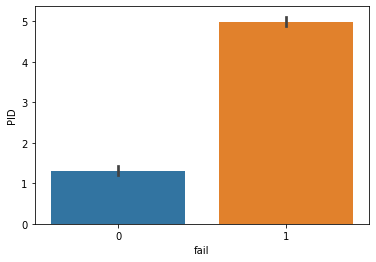

In [23]:
sns.barplot(y='PID',x='fail',data=df)

<AxesSubplot:xlabel='fail', ylabel='footfall'>

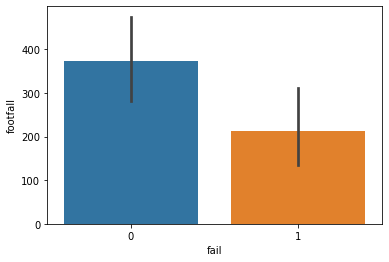

In [24]:
sns.barplot(y='footfall',x='fail',data=df)

<AxesSubplot:xlabel='fail', ylabel='atemp'>

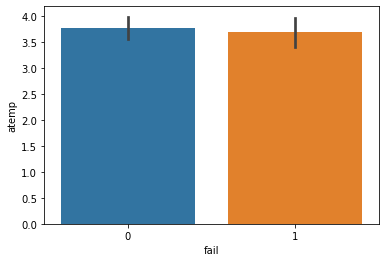

In [25]:
sns.barplot(y='atemp',x='fail',data=df)

<AxesSubplot:xlabel='fail', ylabel='selfLR'>

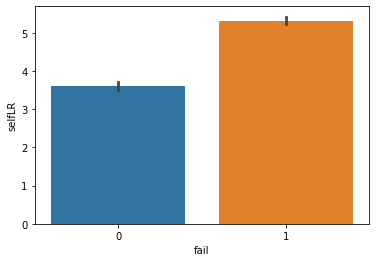

In [26]:
sns.barplot(y='selfLR',x='fail',data=df)

<AxesSubplot:xlabel='fail', ylabel='ClinLR'>

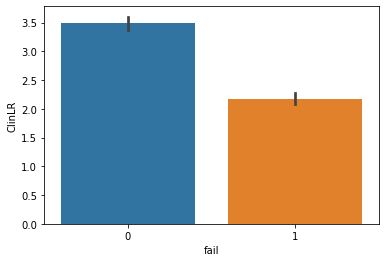

In [27]:
sns.barplot(y='ClinLR',x='fail',data=df)

<AxesSubplot:xlabel='fail', ylabel='DoleLR'>

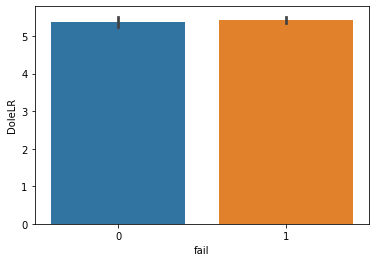

In [28]:
sns.barplot(y='DoleLR',x='fail',data=df)

<AxesSubplot:xlabel='fail', ylabel='outpressure'>

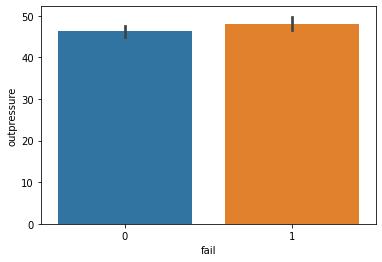

In [29]:
sns.barplot(y='outpressure',x='fail',data=df)

<AxesSubplot:xlabel='fail', ylabel='inpressure'>

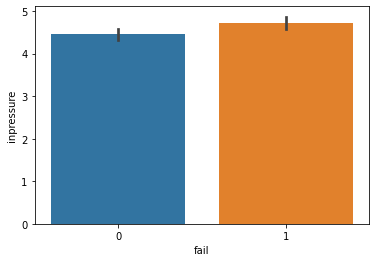

In [30]:
sns.barplot(y='inpressure',x='fail',data=df)

# Observation: 
##  features = [ footfall,selfLR,ClinLR,PID,temp ] these columns shows definite results which helps to analyse shift in performance when crossed the treshold values. 


In [38]:
df.corr()

,footfall,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,fail
footfall,1.000000,0.020457,-0.065816,0.019453,0.025638,-0.089590,-0.043720,-0.003869,-0.018009,-0.073066
atemp,0.020457,1.000000,-0.010855,0.002142,-0.013956,-0.052369,0.408784,-0.058109,-0.062568,-0.014462
selfLR,-0.065816,-0.010855,1.000000,-0.156884,-0.090010,0.618570,0.094656,-0.105868,0.034328,0.583238
ClinLR,0.019453,0.002142,-0.156884,1.000000,-0.352915,-0.399477,-0.032549,-0.206416,-0.225122,-0.466574
DoleLR,0.025638,-0.013956,-0.090010,-0.352915,1.000000,0.048037,-0.026968,0.185739,0.143972,0.018855
PID,-0.089590,-0.052369,0.618570,-0.399477,0.048037,1.000000,0.008023,0.103628,0.208956,0.797329
outpressure,-0.043720,0.408784,0.094656,-0.032549,-0.026968,0.008023,1.000000,-0.158841,-0.078499,0.053668
inpressure,-0.003869,-0.058109,-0.105868,-0.206416,0.185739,0.103628,-0.158841,1.000000,0.372771,0.085624
temp,-0.018009,-0.062568,0.034328,-0.225122,0.143972,0.208956,-0.078499,0.372771,1.000000,0.190257
fail,-0.073066,-0.014462,0.583238,-0.466574,0.018855,0.797329,0.053668,0.085624,0.190257,1.000000


# Correlation : 
## This heatmap shows the how independent features are related with eachother and with the target .Features having values close to 1/-1,are considered high related through which one can understand multicollinearity and correlation with the target feature.

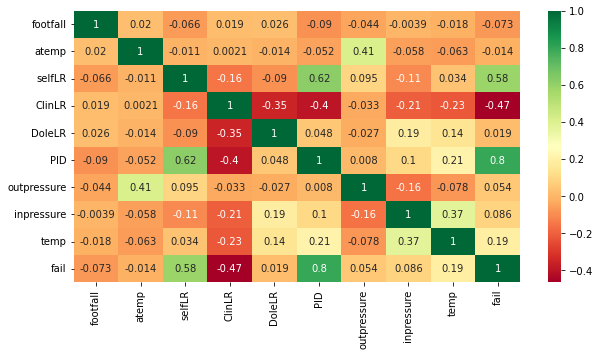

In [39]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap = "RdYlGn")
plt.show()

# Observation: 
## 1. PID,selfLR is showing high positive correlation with the target.
## 2. ClinLR is showing negative correlation with the target.


In [40]:
X = df.drop(columns='fail',axis=1)
y=df['fail']

In [41]:
ordered_rank_features=SelectKBest(score_func=chi2,k=9)
ordered_feature=ordered_rank_features.fit(X,y)

In [42]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=['Score'])
dfcolumns=pd.DataFrame(X.columns)

In [43]:
features_rank = pd.concat([dfcolumns,dfscores],axis=1)

In [44]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,footfall,19258.483493
1,atemp,0.379213
2,selfLR,153.453429
3,ClinLR,133.709144
4,DoleLR,0.100140
5,PID,1090.099068
6,outpressure,15.572225
7,inpressure,3.872981
8,temp,74.611968


# Observation: DoeLR, atemp has least score which shows no importance,so dropping.

In [45]:
df

,footfall,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


In [46]:
final_df = df.drop(['DoleLR','atemp'],axis=1)

In [47]:
final_df

,footfall,selfLR,ClinLR,PID,outpressure,inpressure,temp,fail
0,0,7,1,6,36,3,1,1
1,190,3,3,1,20,4,1,0
2,31,2,2,1,24,6,1,0
3,83,3,4,1,28,6,1,0
4,640,5,6,0,68,6,1,0
...,...,...,...,...,...,...,...,...
939,0,7,1,4,73,6,24,1
940,0,5,2,6,50,6,24,1
941,0,6,2,5,43,6,24,1
942,0,6,2,6,46,7,24,1


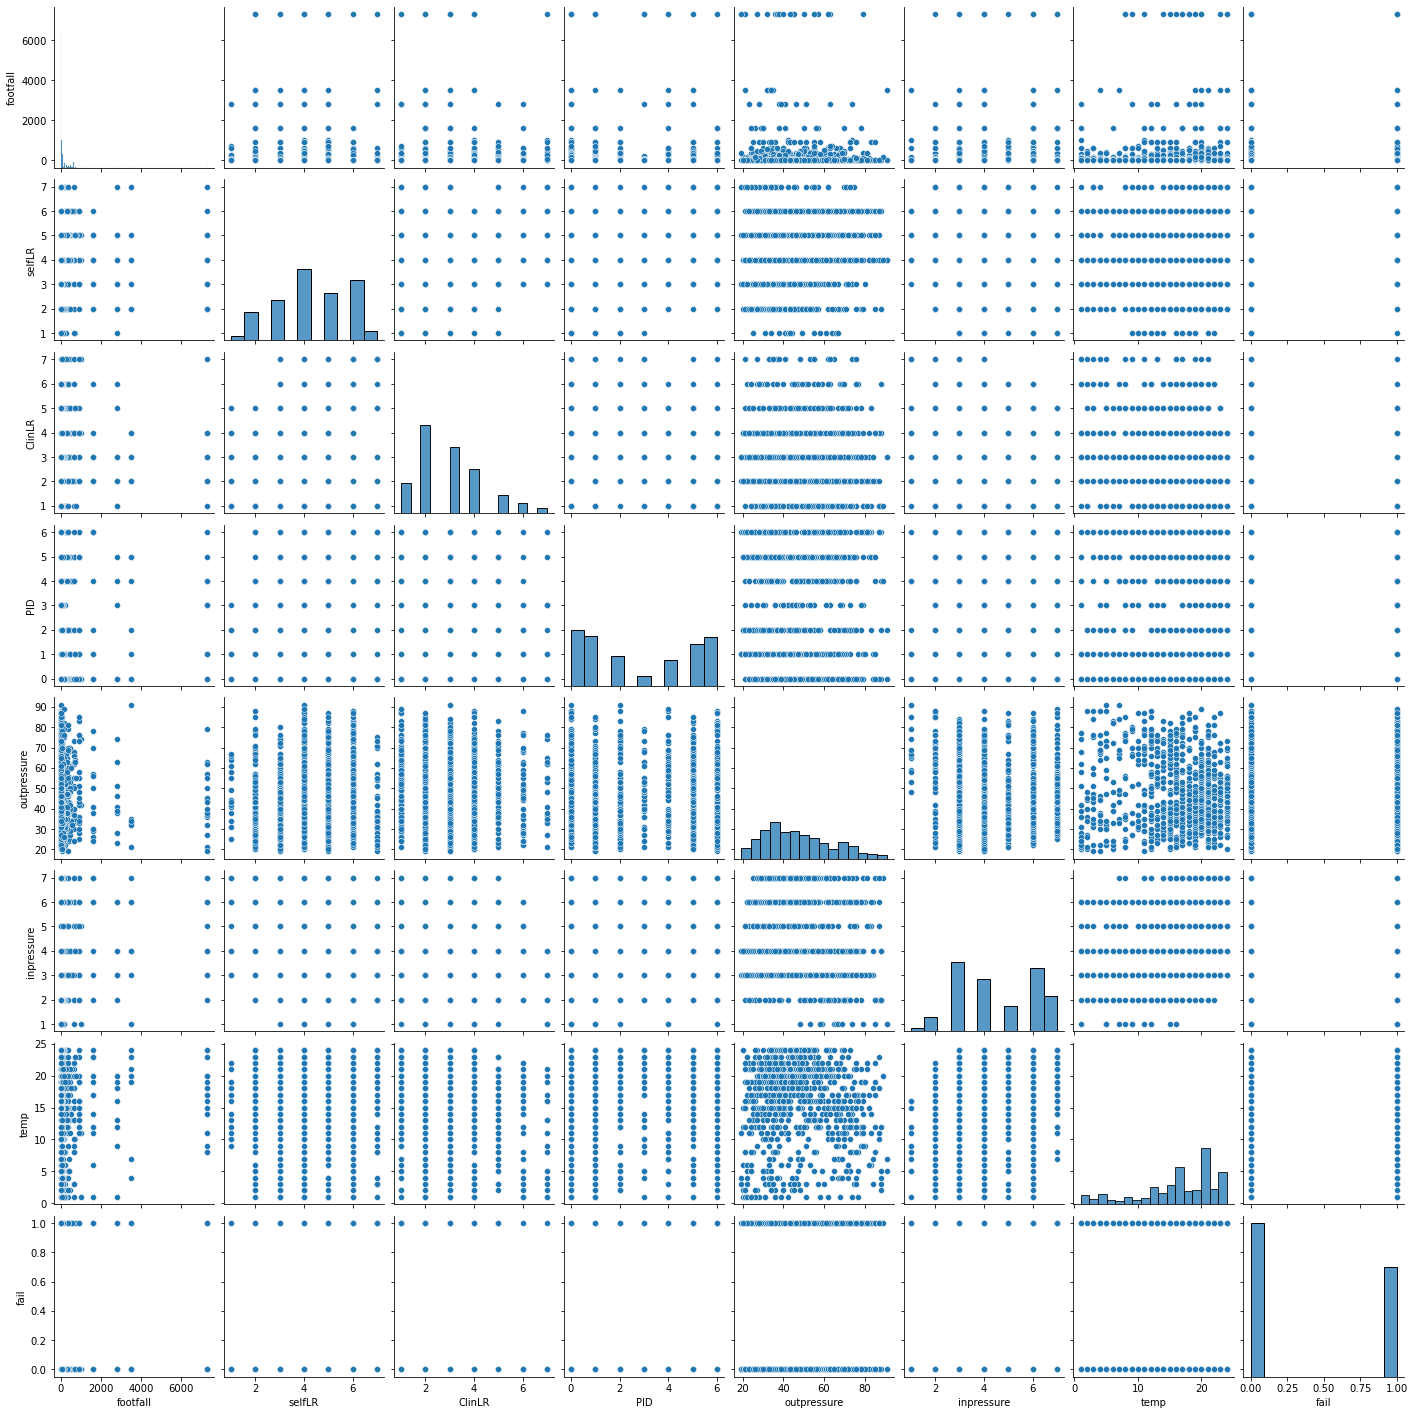

In [48]:
sns.pairplot(final_df)

In [43]:
X = df.drop(columns='fail',axis=1)
y=df['fail']

In [49]:
# dividing dataset into train / test for training the model.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)

# 8. Modelling and Evaluation of Algorithms

## 8.1.1. Logistic Regression

In [54]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
LogReg_Predict = LogReg.predict(X_test)
LogReg_model_score = LogReg.score(X_test, y_test)
LogReg_model_score*100

C:\Users\pbann\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


95.23809523809523

<AxesSubplot:>

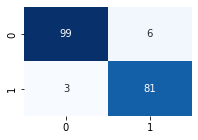

In [57]:
plt.figure(figsize = (3,2))
LRCM = confusion_matrix(y_test, LogReg_Predict)
sns.heatmap(LRCM, annot = True, fmt = 'd', cmap = 'Blues', cbar =  False)

## 8.1.2. Naive Bayes

In [58]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)
GNB_Predict = GNB.predict(X_test)
GNB_model_score = GNB.score(X_test, y_test)
GNB_model_score*100

94.17989417989418

<AxesSubplot:>

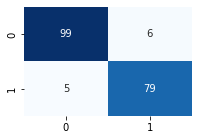

In [59]:
plt.figure(figsize = (3,2))
GNBCM = confusion_matrix(y_test, GNB_Predict)
sns.heatmap(GNBCM, annot = True, fmt = 'd', cmap = 'Blues', cbar =  False)

## 8.1.3. SVM Classifier

In [60]:
SVMC = SVC(gamma = 0.025, C = 4)
SVMC.fit(X_train, y_train)

SVC(C=4, gamma=0.025)

In [61]:
SVMC_Predict = SVMC.predict(X_test)
SVMC_model_score = SVMC.score(X_test, y_test)
SVMC_model_score*100

82.53968253968253

<AxesSubplot:>

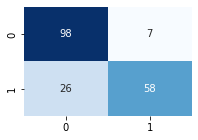

In [62]:
plt.figure(figsize = (3,2))
SVMCM = confusion_matrix(y_test, SVMC_Predict)
sns.heatmap(SVMCM, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)

## 8.1.4. Decision Tree

In [63]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

DecisionTreeClassifier()

In [64]:
predtrain = DTC.predict(X_train)
DTC.score(X_train, predtrain)

1.0

In [65]:
DTC_Predict = DTC.predict(X_test)
DTC_model_score = DTC.score(X_test, y_test)
DTC_model_score*100

88.35978835978835

<AxesSubplot:>

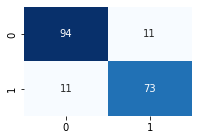

In [66]:
plt.figure(figsize = (3,2))
DTCCM = confusion_matrix(y_test, DTC_Predict)
sns.heatmap(DTCCM, annot = True, fmt = 'd', cmap = 'Blues', cbar =  False)

In [67]:
feature_cols = X_train.columns
feat_importance = DTC.tree_.compute_feature_importances(normalize=False)

feat_imp_dict = dict(zip(feature_cols, DTC.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
PID,0.650699
footfall,0.067570
ClinLR,0.053342
selfLR,0.052811
temp,0.044391
outpressure,0.042599
inpressure,0.030851
DoleLR,0.029715
atemp,0.028023


## 8.1.5. Gradient Boosting Classifier

In [71]:
GBCL = GradientBoostingClassifier(random_state = 25, n_estimators=1000)
GBCL.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=1000, random_state=25)

In [72]:
GBCL_Predict = GBCL.predict(X_test)
accuracy_score(y_test, GBCL_Predict)*100

93.12169312169311

<AxesSubplot:>

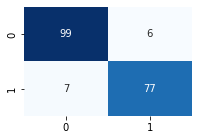

In [73]:
plt.figure(figsize = (3,2))
GBCLCM = confusion_matrix(y_test, GBCL_Predict)
sns.heatmap(GBCLCM, annot = True, fmt = 'd', cmap = 'Blues', cbar =  False)

## 8.1.6. AdaBoost Classifier

In [74]:
ABCL = AdaBoostClassifier(n_estimators=100, random_state=25)
ABCL.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=25)

In [75]:
ABCL_Predict = ABCL.predict(X_test)
accuracy_score(y_test, ABCL_Predict)*100

94.17989417989418

<AxesSubplot:>

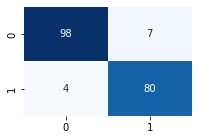

In [76]:
plt.figure(figsize = (3,2))
ABCLCM = confusion_matrix(y_test, ABCL_Predict)
sns.heatmap(ABCLCM, annot = True, fmt = 'd', cmap = 'Blues', cbar =  False)

## 8.1.7. Random Forest Classifier

In [77]:
RFCL = RandomForestClassifier(n_estimators=100)
RFCL.fit(X_train, y_train)

RandomForestClassifier()

In [78]:
RFCL_Predict = RFCL.predict(X_test)
accuracy_score(y_test, RFCL_Predict)*100

96.29629629629629

<AxesSubplot:>

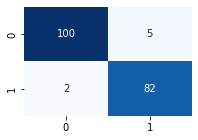

In [79]:
plt.figure(figsize = (3,2))
RFCLCM = confusion_matrix(y_test, RFCL_Predict)
sns.heatmap(RFCLCM, annot = True, fmt = 'd', cmap = 'Blues', cbar =  False)

In [81]:
## 5.1.2. K-Nearest Neighbors

In [82]:
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train, y_train)
KNN_Predict = KNN.predict(X_test)
KNN_model_score = KNN.score(X_test, y_test)
KNN_model_score*100

74.07407407407408

<AxesSubplot:>

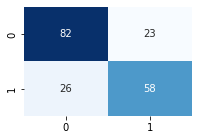

In [83]:
plt.figure(figsize = (3,2))
KNNCM = confusion_matrix(y_test, KNN_Predict)
sns.heatmap(KNNCM, annot = True, fmt = 'd', cmap = 'Blues', cbar =  False)

In [85]:
print("Accuracy Scores")
print("Logistic Regression:", LogReg.score(X_test, y_test)*100,"%")
print("K Nearest Neighbors:", KNN.score(X_test, y_test)*100,"%")
print("Naive Bayes", GNB.score(X_test, y_test)*100,"%")
print("Support Vector Machines:", SVMC.score(X_test, y_test)*100,"%")
print("Decision Tree Classifier 1:", DTC.score(X_test, y_test)*100,"%")
print("AdaBoost Classifier:", ABCL.score(X_test, y_test)*100,"%")
print("GradientBoosting Classifier:", GBCL.score(X_test, y_test)*100,"%")
print("RandomForest Classifier:", RFCL.score(X_test, y_test)*100,"%")

Accuracy Scores
Logistic Regression: 95.23809523809523 %
K Nearest Neighbors: 74.07407407407408 %
Naive Bayes 94.17989417989418 %
Support Vector Machines: 82.53968253968253 %
Decision Tree Classifier 1: 88.35978835978835 %
AdaBoost Classifier: 94.17989417989418 %
GradientBoosting Classifier: 93.12169312169311 %
RandomForest Classifier: 96.29629629629629 %


In [89]:
print("Classification Reports")
print("Logistic Regression")
print(classification_report(y_test, LogReg_Predict))

print("K Nearest Neighbors")
print(classification_report(y_test, KNN_Predict))

print("Naive Bayes")
print(classification_report(y_test, GNB_Predict))

print("Support Vector Machine Classifier")
print(classification_report(y_test, SVMC_Predict))

print("Decision Tree Classifier 1")
print(classification_report(y_test, DTC_Predict))

print("AdaBoost Classifier")
print(classification_report(y_test, ABCL_Predict))

print("GradientBoost Classifier")
print(classification_report(y_test, GBCL_Predict))

print("RandomForest Classifier")
print(classification_report(y_test, RFCL_Predict))

Classification Reports
Logistic Regression
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       105
           1       0.93      0.96      0.95        84

    accuracy                           0.95       189
   macro avg       0.95      0.95      0.95       189
weighted avg       0.95      0.95      0.95       189

K Nearest Neighbors
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       105
           1       0.72      0.69      0.70        84

    accuracy                           0.74       189
   macro avg       0.74      0.74      0.74       189
weighted avg       0.74      0.74      0.74       189

Naive Bayes
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       105
           1       0.93      0.94      0.93        84

    accuracy                           0.94       189
   macro avg       0.94      0.94      0.94       189

# Conclusion :

### The above analysis shows Randomforest Classifier is the best model, as its accuracy is good for both train and test making it as a generalised model. 
### The dataset is to predict sensor failure, for that Recall score has to be given priority as the system shows unhealthiness prior to the failure, if the model able to predict it then it is the best model which means FALSE NEGATIVE is important i.e. Recall, as  Randomforest Classifier is having highest Recall score so this is the best 